# Stochastic Processes, Markov Chains, and Expectations

Graduate Quantitative Economics and Datascience

Jesse Perla (University of British Columbia)

# Overview

## Summary

-   Here we build on the previous lecture on probability and
    distributions to introduce stochastic processes, Markov processes,
    and expectations/forecasts

We will introduce,

1.  **Stochastic Processes** a sequence of events where the probability
    of the next event depends the past events
2.  **Markov Processes** a stochastic process where the probability of
    the next event depends only on the current event

## Extra Materials

-   [Intermediate QuantEcon Markov
    Chains](https://python.quantecon.org/finite_markov.html)
-   [QuantEcon AR1
    Processes](https://python.quantecon.org/ar1_processes.html)
-   <a href="https://intro.quantecon.org/markov_chains_I.html"
    target="_blank">QuantEcon Markov Chains</a>
-   [QuantEcon Simple Markov Chain
    Example](https://datascience.quantecon.org/scientific/randomness.html#loan-states)

## Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from scipy.stats import rv_discrete
from numpy.linalg import matrix_power

# Stochastic and Markov Processes

## Discrete-time Stochastic Process

-   A **stochastic process** is a sequence of random variables
    $\{X_t\}_{t=0}^{\infty}$ [1]
-   Events in $\Omega$ are subtle to define because they contain nested
    information
    -   e.g. the realized random variable $X_t$ depends on $X_{t-1}$,
        $X_{t-2}$, and changes the future random variables $X_{t+1}$,
        $X_{t+2}$, etc.
    -   Similarly, the probability of $X_{t+1}$ is effected by the
        realized $X_t$ and $X_{t-1}$
-   Intuitively we can work with each $\{X_t\}_{t=0}^{\infty}$ and look
    at conditional distributions by considering independence, etc.

## Information Sets and Forecasts

-   Expectations and conditional expectations give us notation for
    making forecasts while carefully defining information available
    -   More general, and not specific to stochastic processes or
        forecasts
    -   Might to “nowcast” or “smooth” to update your previous estimates
-   To formalize
    1.  Define **information set** as the known random variables
    2.  Provide a random variable that is **forecast** using the
        information set
    3.  Typically, provide a function of the random variable of interest
        and calculate the **conditional expectation** given the
        information set

## Forecasts and Conditional Probability Distributions

-   Take a stochastic process $\{X_t\}_{t=0}^{\infty}$

-   Define the **information set** at $t$ as
    $\mathcal{I}_t \equiv \{X_0, X_1, \ldots, X_t\}$

-   The **conditional probability** of $X_{t+1}$ given the information
    set $\mathcal{I}_t$ is

    $$
    \mathbb{P}(X_{t+1} \,|\, X_t,X_{t-1},\ldots X_0) \equiv \mathbb{P}(X_{t+1} \,|\, \mathcal{I}_t)
    $$

    -   e.g. the probability of being unemployed, unemployed, or retired
        next period given the full workforce history
    -   Useful in macroeconomics when you want to formalize expectations
        of the future, as well as econometrics when you want to update
        estimates given different amounts of observation

## Forecasts and Conditional Expectations

-   You may instead be interested in a function, $f(\cdot)$, of the
    random variable (e.g., financial payoffs, utility, losses in
    econometrics)

-   Use the conditional probability of the forecasts for **conditional
    expectations**

    $$
    \mathbb{E}[f(X_{t+1}) \,|\, X_t,X_{t-1},\ldots X_0] \equiv \mathbb{E}[f(X_{t+1}) \,|\, \mathcal{I}_t]
    $$

    -   e.g. the expected utility of being unemployed next period given
        the history of unemployment; or the expected dividends in a
        portfolio next period given the history of dividends

-   Standard properties of expectations hold conditioning on information
    sets,

    -   $\mathbb{E}[A\, X_{t+1} + B\, Y_{t+1} \,|\, \mathcal{I}_t] = A\, \mathbb{E}[X_{t+1} \,|\, \mathcal{I}_t] + B\, \mathbb{E}[Y_{t+1} \,|\, \mathcal{I}_t]$
    -   $\mathbb{E}[X_t \,|\, \mathcal{I}_t] = X_t$, i.e., not
        stochastic if the information set $X_t$

## Easy Notation for Information Sets

-   Information sets in stochastic processes are often just a sequence
    for the entire history. Hence the time, $t$, is often sufficient
-   Given $\mathcal{I}_t \equiv \{X_0, X_1, \ldots, X_t\}$ for shorthand
    we can denote

$$
\begin{aligned}
\mathbb{E}[f(X_{t+1}) \,|\, X_t,X_{t-1},\ldots X_0] &\equiv \mathbb{E}[f(X_{t+1}) \,|\, \mathcal{I}_t]\\
&\equiv \mathbb{E}_t[f(X_{t+1})]
\end{aligned}
$$

## Law of Iterated Expectations for Stochastic Processes

-   Recall that $\mathcal{I}_t \subset \mathcal{I}_{t+1}$ since
    $X_{t+1}$ is known at $t+1$
-   The **Law of Iterated Expectations** can be written as

$$
  \begin{aligned}
  \mathbb{E}\left[\mathbb{E}[X_{t+2} \,|\, X_{t+1}, X_t, X_{t-1}, \ldots]\,|\,X_t, X_{t-1}, \ldots\right] &= \mathbb{E}[X_{t+2}\,|\,X_t, X_{t-1}, \ldots]\\
  \mathbb{E}\left[\mathbb{E}[X_{t+2} \,|\, \mathcal{I}_{t+1}]\,|\,\mathcal{I}_t\right] &= \mathbb{E}[X_{t+2}\,|\,\mathcal{I}_t]\\
  \mathbb{E}_t[\mathbb{E}_{t+1}[X_{t+2}]] &= \mathbb{E}_t[X_{t+2}]
  \end{aligned}
  $$

-   i.e. if I am forecasting my forecast, I can only use information
    available today

## Markov Processes

-   **(1st-Order) Markov Process**: a stochastic process where the
    conditional probability of the future is independent of the past
    given the present

    $$
    \mathbb{P}(X_{t+1} \,|\, X_t, X_{t-1}, \ldots) = \mathbb{P}(X_{t+1} \,|\, X_t)
    $$

    -   Or with information sets:
        $\mathbb{P}(X_{t+1} \,|\, \mathcal{I}_t) = \mathbb{P}(X_{t+1} \,|\, X_t)$
    -   i.e., the present sufficiently summarizes the past for
        predicting the future

-   **Conditional expectations** are are then $$
    \mathbb{E}[f(X_{t+1}) \,|\,  X_t, X_{t-1},\ldots X_0] = \mathbb{E}[f(X_{t+1}) \,|\, X_t]
    $$

## Martingales

-   A stochastic process $\{X_t\}_{t=0}^{\infty}$ is a **martingale** if

$$
\mathbb{E}[X_{t+1} \,|\, X_t, X_{t-1}, \ldots, X_0] = X_t
$$

-   Not all martingales are Markov processes, but most of the ones you
    will encounter are. If Markov,

$$
\mathbb{E}[X_{t+1} \,|\, X_t] = X_t,\quad \text{ or } \quad \mathbb{E}_t[X_{t+1}] = X_t
$$

See
[here](https://en.wikipedia.org/wiki/Martingale_(probability_theory))
for a more formal definition with the complete set of requirements

## Random Walks

-   Let $X_t \in \{-\infty, \ldots, -1, 0, 1, \ldots \infty\}$

-   A simple two-state random walk can be written as the following
    transition

    $$
    \mathbb{P}(X_{t+1} = X_t + 1\,|\,X_t) = \mathbb{P}(X_{t+1} = X_t - 1\,|\,X_t) = \frac{1}{2}
    $$

-   Markov since $X_t$ summarizes the past. Martingale?

$$
\begin{aligned}
\mathbb{E}(X_{t+1} \,|\, X_t) &= \mathbb{P}(X_{t+1} = X_t+1\,|\,X_t)\times (X_t+1)\\
& + \mathbb{P}(X_{t+1} = X_t-1\,|\,X_t)\times (X_t-1)\\
&= \frac{1}{2} (X_t + 1) + \frac{1}{2} (X_t - 1) = X_t
\end{aligned}
$$

## Implementation in Python

-   Generic code to simulate a random walk with IID steps

[1] See formal definition
[here](https://en.wikipedia.org/wiki/Stochastic_process#Definitions)

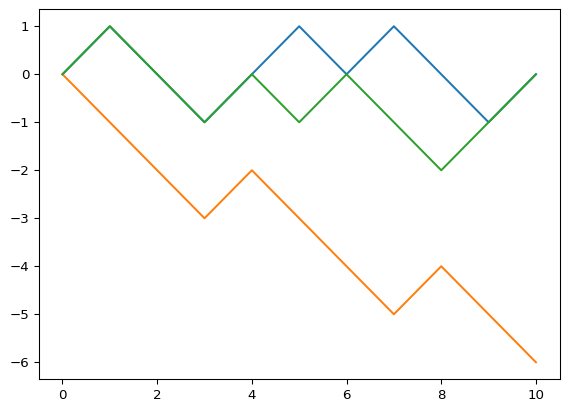

In [3]:
def simulate_walk(rv, X_0, T):
  X = np.zeros((X_0.shape[0], T+1))
  X[:, 0] = X_0
  for t in range(1, T+1):
    X[:, t] = X[:, t-1] \
              +rv.rvs(size=X_0.shape[0])
  return X
steps = np.array([-1, 1])
probs = np.array([0.5, 0.5])
rv = rv_discrete(values=(steps, probs))
X_0 = np.array([0.0, 0.0, 0.0])
X = simulate_walk(rv, X_0, 10)
plt.figure()
plt.plot(X.T)

## Visualizing the Distribution of Many Trajectories

-   $\mathbb{E}_0[X_t] \to 0$ for finite $t$ as $t \to \infty$
-   But is there a limiting distribution of $X_t$ as $X_t \to \infty$?

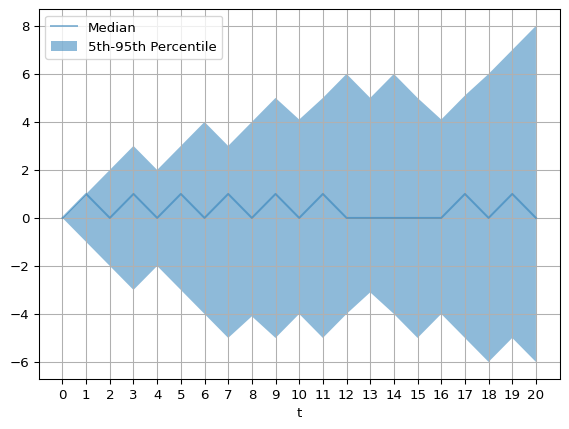

In [4]:
num_trajectories, T = 100, 20
X = simulate_walk(rv, np.zeros(num_trajectories), T)
percentiles = np.percentile(X, [50, 5, 95], axis=0)
fig, ax = plt.subplots()
plt.plot(np.arange(T+1), percentiles[0,:], alpha=0.5, label='Median')
plt.fill_between(np.arange(T+1), percentiles[1,:], percentiles[2,:],
  alpha=0.5, label='5th-95th Percentile')
plt.xlabel('t')
ax.set_xticks(np.arange(T+1))
plt.legend()
plt.grid(True)

## AR(1) Processes

-   An **auto-regressive process** of order 1, AR(1), is the Markov
    process

    $$
    X_{t+1} = \rho X_t + \sigma \epsilon_{t+1}
    $$

    -   $\rho$ is the **persistence** of the process, $\sigma\geq 0$ is
        the **volatility**
    -   $\epsilon_{t+1}$ is a random shock, we will assume
        $\mathcal{N}(0,1)$

-   Can show $X_{t+1}\,|\,X_t \sim \mathcal{N}(\rho X_t, \sigma^2)$ and
    hence

$$
\mathbb{E}_t[X_{t+1}] = \rho X_t,\quad \mathbb{V}_t[X_{t+1}] = \sigma^2
$$

For much more, see [QuantEcon Lectures on
AR(1)](https://python.quantecon.org/ar1_processes.html)

## Stationarity and Unit Roots

-   **Unit roots** are a special case of AR(1) processes where
    $\rho = 1$
-   They are important in econometrics because they tell us if processes
    have permanent or transitory changes
    -   The econometrics of finding whether $\rho = 1$ are subtle and
        important
-   Note that if $\rho = 1$ then this is a **martingale** since
    $\mathbb{E}_t[X_{t+1}] = X_t$
-   These are an important example of a **non-stationary process**.
-   Intuitively: stationary if $X_t$ distribution has well-defined limit
    as $t \to \infty$
    -   Key requirements: $\lim_{t\to\infty}|\mathbb{E}[X_t]| < \infty$
        and $\lim_{t\to\infty}\mathbb{V}(X_t) < \infty$

See [here](https://en.wikipedia.org/wiki/Stationary_process) for a
rigorous definitions and different types of stationarity and discussion
of auto-covariance

## Simulating Unit Root

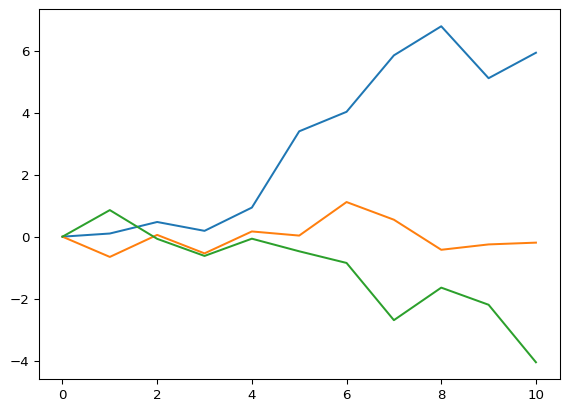

In [5]:
X_0 = np.array([0.0, 0.0, 0.0])
rv_epsilon = scipy.stats.norm(loc=0, scale=1) 
X = simulate_walk(rv_epsilon, X_0, 10)
plt.figure()
plt.plot(X.T)

## Visualizing the Distribution of Many Trajectories

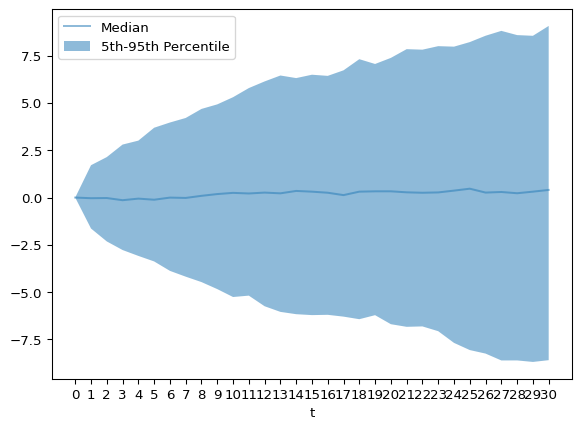

In [6]:
num_trajectories, T = 500, 30
X = simulate_walk(rv_epsilon, np.zeros(num_trajectories), T)
percentiles = np.percentile(X, [50, 5, 95], axis=0)
fig, ax = plt.subplots()
plt.plot(np.arange(T+1), percentiles[0,:], alpha=0.5, label='Median')
plt.fill_between(np.arange(T+1), percentiles[1,:], percentiles[2,:],
  alpha=0.5, label='5th-95th Percentile')
plt.xlabel('t')
ax.set_xticks(np.arange(T+1))
plt.legend()
plt.show()

## Martingales and Arbitrage in Finance

-   **Random Walks** are a key model in finance
    -   e.g. stock prices, exchange rates, etc.
-   Central to no-arbitrage pricing, after adjusting to interest
    rates/risk/etc.
    -   e.g. if you could predict the future price of a stock, you could
        make money by buying/selling today
    -   Martingales have no systematic drift which leads to a key source
        of arbitrage (especially with options/derivatives)
-   Does this prediction hold up in the data? Generally yes, but depends
    on how you handle risk/etc.
    -   If it were systematically wrong then hedge funds and traders
        would be far richer than they are now

## Information and Arbitrage

$$
\mathbb{E}[X_{t+1}\,|\,\mathcal{I}_t] = X_t\\
$$

-   Given all of the information available, the best forecast of the
    future is the current price. Plenty of variables in $\mathcal{I}_t$
    for individuals, including public prices

-   Does this mean there is never arbitrage?

    -   No, just that it may be short-term because prices feed back into
        $\mathcal{I}_t$
    -   So some individuals make short term money given private
        information, but that information quickly becomes reflecting in
        other people’s information sets (typically through prices)
    -   How, and how quickly markets aggregate information is a key
        question in financial economics

# Markov Chains

## Discrete-Time Markov Chains

-   A **Markov Chain** is a Markov process with a finite number of
    states

    -   $X_t \in \{0, \ldots, N-1\}$ be a sequence of Markov random
        variables
    -   In discrete time it can be represented by a **transition
        matrix** $P$ where

    $$
    P_{ij} \equiv \mathbb{P}(X_{t+1} = j \,|\, X_t = i)
    $$

-   We are counting from $0$ to $N-1$ for coding convenience in Python.
    Names of discrete states are arbitrary!

    -   Count from 1 in R, Julia, Matlab, Fortran, instead

A [continuous-time Markov
Chain](https://en.wikipedia.org/wiki/Continuous-time_Markov_chain#:~:text=A%20continuous%2Dtime%20Markov%20chain,probabilities%20of%20a%20stochastic%20matrix.)
instead uses a **transition rate matrix** $\Lambda$ where
$\Lambda_{ij} = \lambda_{ij}$ is the rate of transitioning from state
$i$ to state $j$. All rows such to $0$ rather than $1$. Many properties
have analogies, for example there is an eigenvalue of $0$ rather than an
eigenvalue of $1$

## Stochastic Matrices

-   $P$ is a [stochastic
    matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) if
    -   $\sum_{j=0}^{N-1} P_{ij} = 1$ for all $i$, i.e. rows are
        conditional distributions
-   **Key Property:**
    -   One (or more) eigenvalue of $1$ with associated left-eigenvector
        $\pi$ $$
        \pi P = \pi
        $$
    -   Equivalently the right eigenvector with eigenvalue $=1$ $$
        P^{\top}\pi^{\top} =   \pi^{\top}
        $$
    -   Where we can normalize to $\sum_{n=0}^{N-1} \pi_i = 1$

## Transitions and Conditional Distributions

-   The $P$ summarizes all transitions. Let $X_t$ be the state at time
    $t$ which in general is a probability distribution with pmf $\pi_t$

-   Can show that the evolution of this distribution is given by

    $$
    \pi_{t+1} = \pi_t \cdot P
    $$

-   And hence given some $X_t$ we can forecast the distribution of
    $X_{t+j}$ with

    $$
    X_{t+j}\,|\,X_t \sim \pi_t \cdot P^j
    $$

    -   i.e., using the matrix power we discussed in previous lectures

## Stationary Distribution

-   Take some $X_t$ initial condition, does this converge?

    $$
    \lim_{j\to\infty} X_{t+j}\,|\,X_t = \lim_{j\to\infty} \pi_t \cdot P^j = \pi_{\infty}?
    $$

    -   Does it exist? Is it unique?

-   How does it compare to fixed point below, i.e. does
    $\bar{\pi} = \pi_{\infty}$ for all $X_t$?

    $$
    \bar{\pi} = \bar{\pi} \cdot P
    $$

    -   This is the eigenvector associated with the eigenvalue of $1$ of
        $P^{\top}$
    -   Can prove there is always at least one. If more than one,
        multiplicity

The conditions for stationary distributions, uniqueness, etc. are
covered [here](https://intro.quantecon.org/markov_chains_II.html)

## Conditional Expectations

-   Given the conditional probabilities, expectations are easy
-   Now assign $X_t$ as a random variable with values $x_1, \ldots x_N$
    and pmf $\pi_t$
-   Define $x \equiv \begin{bmatrix}x_0 & \ldots & x_{N-1}\end{bmatrix}$
-   From definition of conditional expectations

$$
\mathbb{E}[X_{t+j} \,|\, X_t] = \sum_{i=0}^{N-1} x_i \pi_{t+j,i} = (\pi_t \cdot P^j) \cdot x
$$

## Example of Markov Chain: Employment Status

-   Employment(E) in state $0$, Unemployment(U) in state $1$
-   $\mathbb{P}(U\,|\,E) = a$ and $\mathbb{P}(E\,|\,E) = 1 - a$
-   $\mathbb{P}(E\,|\,U) = b$ and $\mathbb{P}(U\,|\,U) = 1 - b$
-   Transition matrix $P\equiv$ $$
     \begin{array}{c@{\hspace{1em}}c}
    & 
    \begin{array}{cc}
      \underbrace{\scriptstyle X_{t+1} = E}_{\phantom{1-a}} & \underbrace{\scriptstyle X_{t+1} = U}_{\phantom{a}}
    \end{array}
    \\
    \begin{array}{c}
      \scriptstyle X_t = E\,\Big\} \\
      \scriptstyle X_t = U\,\Big\}
    \end{array}
    &
    \left[\begin{array}{cc}
      1-a & a \\
      b & 1-b
    \end{array}\right]
    \end{array}
    $$

## Visualizing the Chain

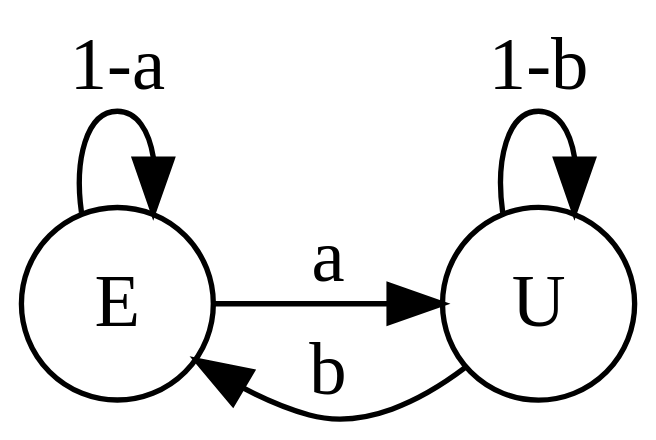

## Transitions and Probabilities

-   Let $\pi_0 \equiv \begin{bmatrix}1 & 0\end{bmatrix}^{\top}$,
    i.e. $\mathbb{P}(X_0 = E) = 1$
-   The distribution of $X_1$ is then $\pi_1 = \pi_0 \cdot P$
    -   $\mathbb{P}(X_1 = E\,|\,X_0=E) = \pi_{11}$ (first element)
    -   Can use to forecast probability of employment $j$ periods in
        future
-   Can also use our conditional expectations to calculate expected
    income
    -   Define income in E state as $100,000$ and $20,000$ in the U
    -   $x \equiv \begin{bmatrix}100,000 & 20,000\end{bmatrix}^{\top}$

$$
\mathbb{E}[X_{t+j} \,|\, X_t = E] = (\begin{bmatrix}1 & 0\end{bmatrix} \cdot P^j) \cdot x
$$

## Coding Markov Chain in Python

-   We can make simulation easier if turn rows into conditional
    distributions
-   Count states from $0$ to make coding easier, i.e. $E = 0$ and
    $U = 1$

In [7]:
a, b = 0.05, 0.1
P = np.array([[1-a, a],  # P(X | E)
              [b, 1-b]]) # P(X | U)
N = P.shape[0]
P_rv = [rv_discrete(values=(np.arange(0,N),
                    P[i,:])) for i in range(N)]
X_0 = 0 # i.e. E
X_1 = P_rv[X_0].rvs() # draw index | X_0                         
print(f"X_0 = {X_0}, X_1 = {X_1}")
T = 10
X = np.zeros(T+1, dtype=int)
X[0] = X_0
for t in range(T):
  X[t+1] = P_rv[X[t]].rvs() # draw given X_t
print(f"X_t indices =\n {X}")

X_0 = 0, X_1 = 0
X_t indices =
 [0 0 0 0 0 0 0 0 0 0 0]

## Simulating Many Trajectories

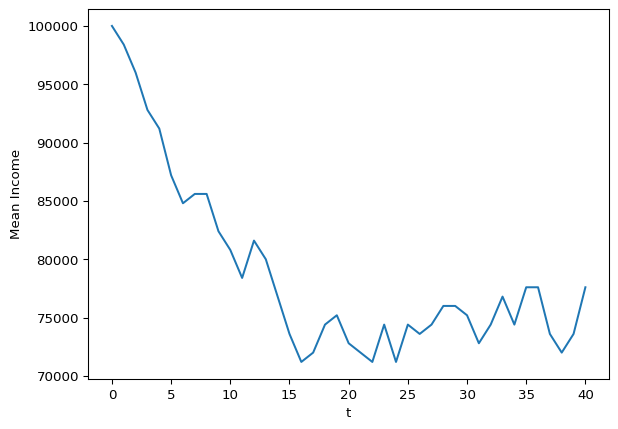

In [8]:
def simulate_markov_chain(P, X_0, T):
  N = P.shape[0]
  num_chains = X_0.shape[0]
  P_rv = [rv_discrete(values=(np.arange(0,N),
                      P[i,:])) for i in range(N)]
  X = np.zeros((num_chains, T+1), dtype=int)
  X[:,0] = X_0
  for t in range(T):
      for n in range(num_chains):
          X[n, t+1] = P_rv[X[n, t]].rvs()
  return X
X_0 = np.zeros(100, dtype=int) # 100 people start employed
T = 40
X = simulate_markov_chain(P, X_0, T)
# Map indices to RV values
values = np.array([100000.00, 20000.00]) # map state to value
X_values = values[X] # just indexes by the X

# Plot means
X_mean = np.mean(X_values, axis=0)
plt.plot(np.arange(0, T+1), X_mean)
plt.xlabel('t')
plt.ylabel('Mean Income')
plt.show()

## Visualizing the Distribution of Many Trajectories

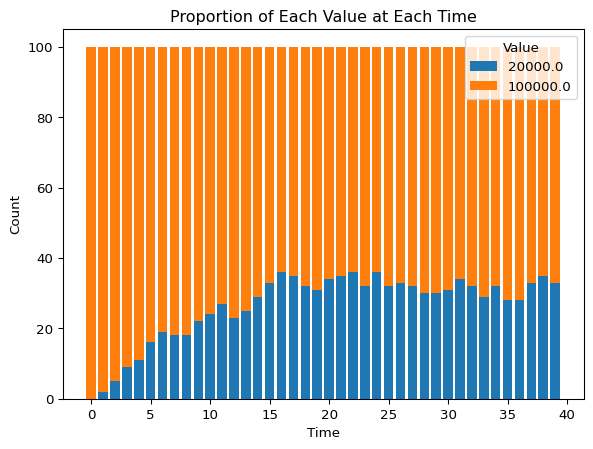

In [9]:
# Count the occurrences of each unique value at each time step
unique_values = np.unique(X_values)
counts = np.array([[np.sum(X_values[:, t] == val) for val in unique_values] for t in range(T)])

# Create the stacked bar chart
fig, ax = plt.subplots()
bottoms = np.zeros(T)
for i, val in enumerate(unique_values):
    ax.bar(range(T), counts[:, i], bottom=bottoms, label=str(val))
    bottoms += counts[:, i]

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Proportion of Each Value at Each Time')
ax.legend(title='Value')
plt.show()

## Stationary Distribution

-   Recall different ways to think about steady states
    -   Left-eigenvector: $\bar{\pi} = \bar{\pi} P$
    -   Limiting distribution: $\lim_{T\to\infty}\pi_0 P^T$
-   Can show that the stationary distribution is
    $\bar{\pi} = \begin{bmatrix}\frac{b}{a+b} & \frac{a}{a+b}\end{bmatrix}$

In [11]:
eigvals, eigvecs = np.linalg.eig(P.T)
pi_bar = eigvecs[:, np.isclose(eigvals, 1)].flatten().real
pi_bar = pi_bar / pi_bar.sum()
pi_0 = np.array([1.0, 0.0])
pi_inf = pi_0 @ matrix_power(P, 100)
print(f"pi_bar = {pi_bar}")
print(f"pi_inf = {pi_inf}")

pi_bar = [0.66666667 0.33333333]
pi_inf = [0.6666667 0.3333333]

## Expected Income

-   Recall that
    $\mathbb{E}[X_{t+j} \,|\, X_t = E] = (\begin{bmatrix}1 & 0\end{bmatrix} \cdot P^j) \cdot x$

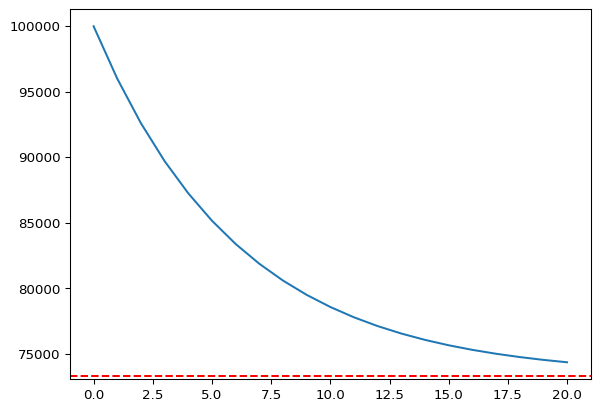

In [12]:
def forecast_distributions(P, pi_0, T):
    N = P.shape[0]
    pi = np.zeros((T+1, N))
    pi[0, :] = pi_0
    for t in range(T):
        pi[t+1, :] = pi[t, :] @ P
    return pi
x = np.array([100000.00, 20000.00])
pi_0 = np.array([1.0, 0.0])
T = 20
pi = forecast_distributions(P, pi_0, T)
E_X_t = np.dot(pi, x)
E_X_bar = pi_bar @ x
plt.plot(np.arange(0, T+1), E_X_t)
plt.axhline(E_X_bar, color='r',
  linestyle='--')
plt.show()